In [13]:
import re 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

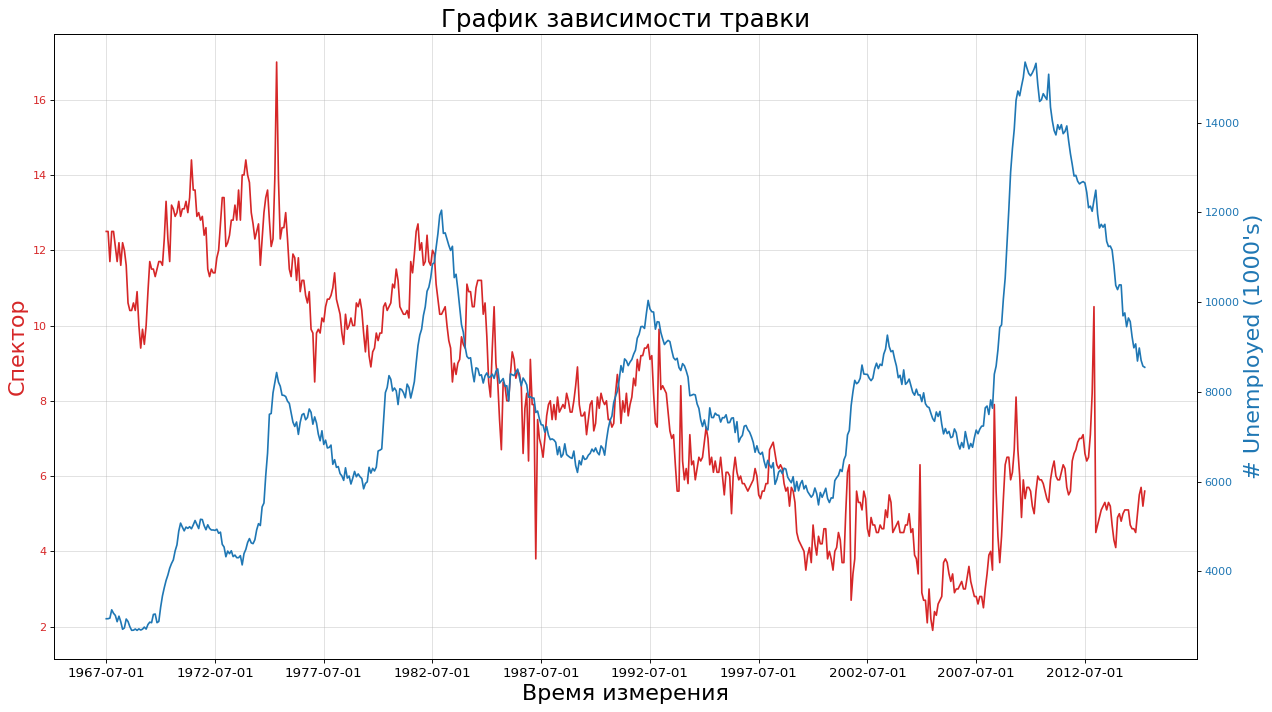

In [67]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")

x  = df['date']
y1 = df['psavert']
y2 = df['unemploy']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Время измерения', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Спектор', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("# Unemployed (1000's)", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("График зависимости травки", fontsize=22)
fig.tight_layout()
plt.show()

строка[ >>>>>Begin Spectral Data<<<<< ]заканчивается с позиции 391
391 29700

198.437	81.25
198.909	31.91
199.38	102.63
199.852	193.9
200.324	135.45
200.795	138.62
201.267	99.87
201.739	172.61
202.21	186.65
202.682	382.38
203.153	318.44
203.625	-2919.23
204.096	429.78
204.568	372.27
205.039	160.54
205.51	180.35
205.982	151.52
206.453	135.61
206.924	104.61
207.396	142.03
207.867	181.98
208.338	159.53
208.809	143.18
209.28	295.11
209.751	156.82
210.222	87.78
210.694	86.31
211.165	125.49
211.636	89.49
212.106	54.2
212.577	53.96
213.048	97.7
213.519	94.19
213.99	91.64
214.461	124.03
214.932	150
215.402	187.94
215.873	259.24
216.344	345.51
216.814	-3792.86
217.285	-596.25
217.756	-205.05
218.226	-151.06
218.697	-134.71
219.167	-110.22
219.638	-280.59
220.108	874.14
220.579	148.23
221.049	184.13
221.519	127.9
221.99	142.32
222.46	138.95
222.93	451.74
223.401	157.86
223.871	169.76
224.341	252.91
224.811	187.03
225.281	119.45
225.751	215.63
226.221	144.19
226.691	73.49
227.161	153
227.631	225


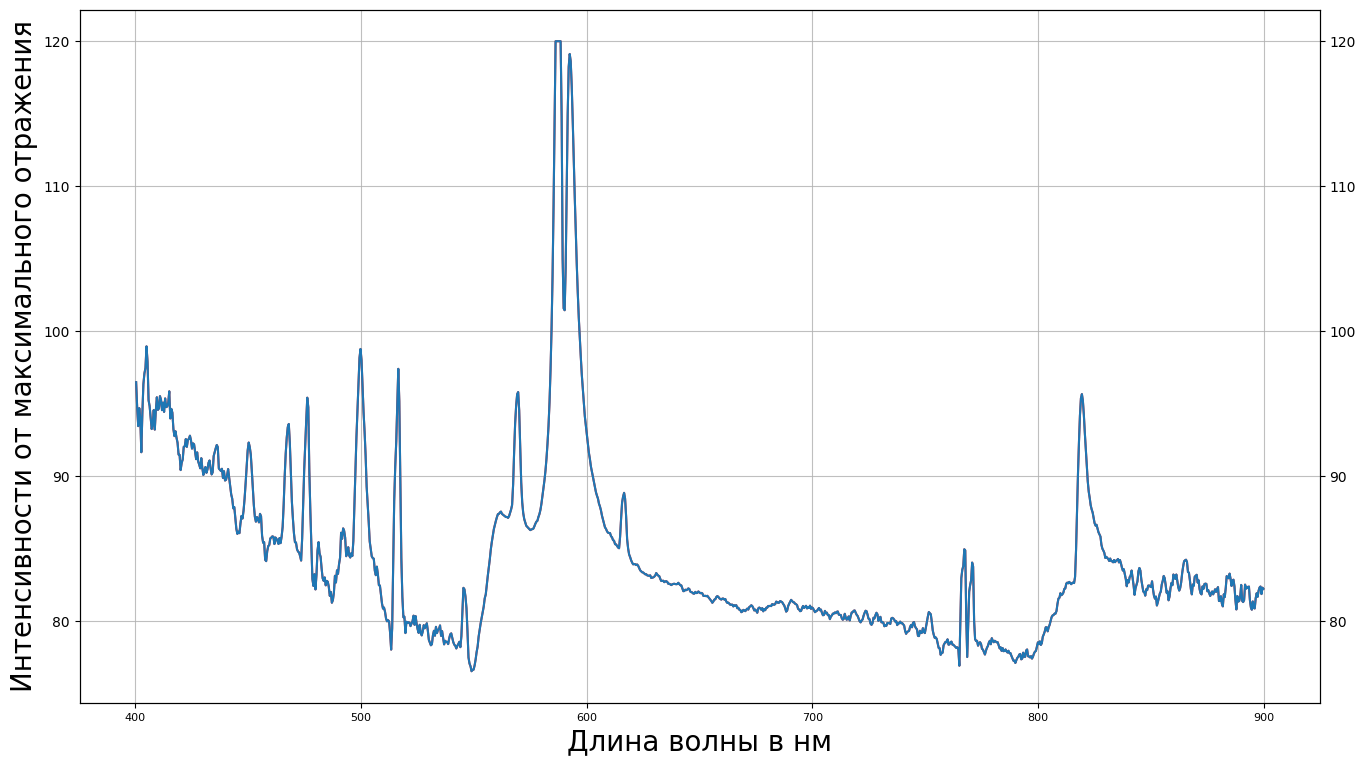

In [140]:
with open('data/2022_09_23/week_8/8_week_ht_vgood_Reflection__0__13-43-47-404.txt', 'r') as file:
    data = file.read().rstrip()

for m in re.finditer(r'>>>>>Begin Spectral Data<<<<<', data): 
    print('строка[', m[0], ']заканчивается с позиции', m.end())

print(str(m.end()) + " " + str(len(data)))

str_result = ""

for index in range(m.end(), len(data)):
    str_result += data[index]

print(str(str_result))

result_x = []
result_y = []

reg_result = re.split(r'(\d{0,6}\.?\d{0,6})(\s{0,6})(\-?\d{0,6}\.?\d{0,6})', str_result)

reg_result_updated = [value for value in reg_result if value != "\t" and value != "\n" and value != '']


skip = False
for i in range(0, len(reg_result_updated)):
    if(skip == False):
        value = float(reg_result_updated[i])
        if i % 2 == 0:
            if(value >= 400.0 and value <= 900.0):
                result_x.append(value)
            else:
                skip = True
        else:
            if(value > 120):
                value = 120
            if(value < 0):
                value = 0
            result_y.append(value)
    else:
        skip = False
        


assert(len(result_x) == len(result_y))


# print(result_x)
# print(result_y)

pd_x = pd.array(result_x)
pd_y = pd.array(result_y)

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 100)
ax1.plot(pd_x, pd_y, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(pd_x, pd_y, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Длина волны в нм', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=8)

ax1.set_ylabel('Интенсивности от максимального отражения',  fontsize=20)
ax1.tick_params(axis='y', rotation=0)
ax1.grid(alpha=.8)

plt.show()